In [11]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [13]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

In [15]:
%matplotlib inline

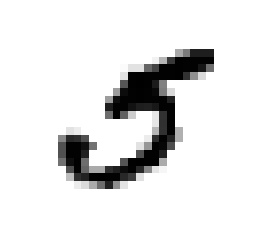

In [23]:
import matplotlib 
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [27]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[-10000:], y[-10000:]

In [28]:
import numpy as np

In [29]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [30]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [33]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [34]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96935,  0.9646 ,  0.9654 ])

In [35]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [36]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90665,  0.9111 ,  0.9112 ])

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53951,   628],
       [ 1385,  4036]])

In [41]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.86535162950257294

In [43]:
recall_score(y_train_5, y_train_pred)

0.74451208264157909

In [45]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.80039662865642058

In [47]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 258525.29296125])

In [49]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [51]:
threshold = 300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [52]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, threholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Prediction")
    plt.plot(threholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threhold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

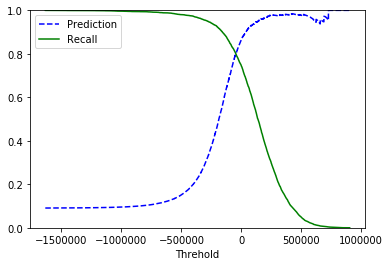

In [57]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [58]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("true positive rate")

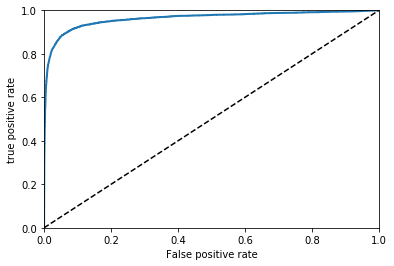

In [64]:
plot_roc_curve(fpr, tpr)
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96278939623502124

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_fores = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [75]:
y_scores_forest = y_probas_fores[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

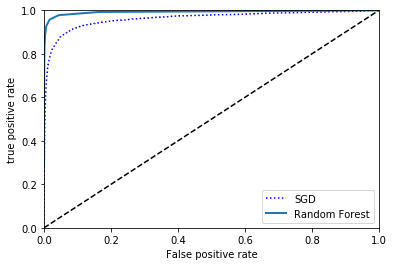

In [78]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [80]:
roc_auc_score(y_train_5, y_scores_forest)

0.99272103992513894

In [81]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [83]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-138288.60267189, -511266.40364188, -595278.66331101,
        -247992.0706417 , -312787.53934972,  258525.29296125,
        -722258.02690116, -311438.72929442, -615495.33134842,
        -714011.56531035]])

In [85]:
np.argmax(some_digit_scores)

5

In [87]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [91]:
len(ovo_clf.estimators_)

45

In [92]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [94]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0.1,  0.7,  0. ,  0. ,  0. ,  0. ]])

In [95]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.88287343,  0.86714336,  0.86567985])

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90736853,  0.91019551,  0.91088663])

In [98]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    3,   18,   13,   12,   55,   45,    7,   37,    3],
       [   1, 6482,   40,   31,    6,   43,    8,    9,  110,   12],
       [  53,   43, 5299,  118,   90,   33,   87,   61,  160,   14],
       [  47,   42,  128, 5334,    2,  250,   32,   55,  145,   96],
       [  23,   27,   35,    9, 5368,    9,   52,   30,   89,  200],
       [  67,   44,   28,  177,   74, 4647,  101,   27,  161,   95],
       [  38,   24,   46,    2,   44,   99, 5608,    5,   51,    1],
       [  20,   25,   61,   32,   52,   10,    4, 5826,   17,  218],
       [  51,  161,   65,  150,   12,  175,   52,   28, 5014,  143],
       [  45,   35,   22,   92,  164,   37,    2,  217,   74, 5261]])

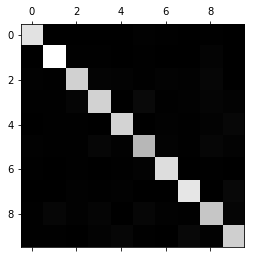

In [99]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [100]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

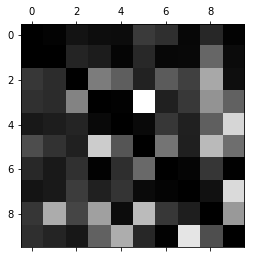

In [102]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()